In [1]:
#importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, SGDRegressor, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score

from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import PartialDependenceDisplay
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
insurance_data = pd.read_csv('D:/major project/code/Medicalpremium.csv')

In [3]:
insurance_data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
insurance_data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [6]:
insurance_data.shape

(986, 11)

In [7]:
insurance_data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

<Figure size 600x600 with 0 Axes>

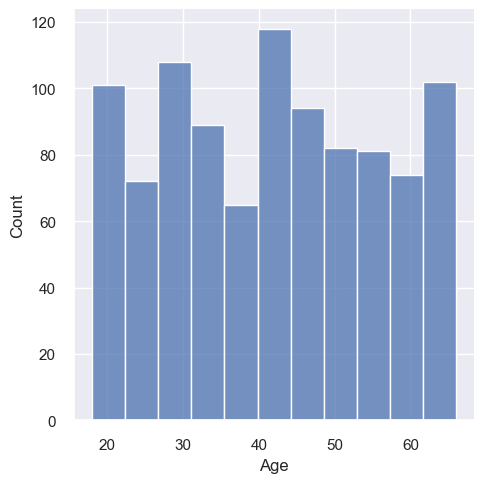

In [8]:
#Data Distribution for Numerical Column - Age
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['Age'])
plt.show()

In [9]:
insurance_data['Age'].value_counts()

43    30
27    27
42    27
35    26
45    25
59    25
44    24
25    24
48    24
66    23
46    23
18    23
33    23
49    23
32    22
29    22
47    22
64    22
24    22
30    22
19    21
62    21
21    21
31    20
51    20
50    20
54    20
63    19
36    19
52    19
40    19
22    19
37    18
34    18
41    18
38    17
20    17
55    17
53    17
60    17
28    17
65    17
61    16
58    16
56    15
23    13
26    13
57    12
39    11
Name: Age, dtype: int64

<Figure size 600x600 with 0 Axes>

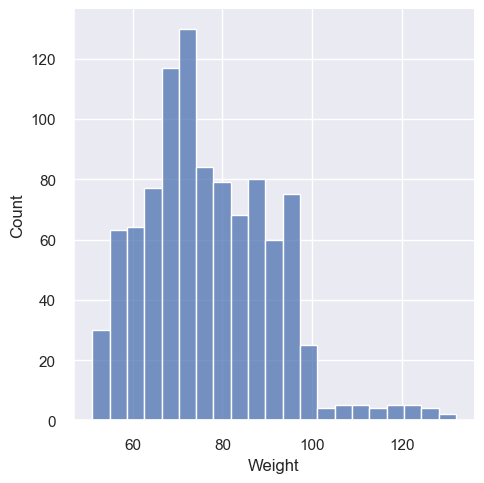

In [10]:
#Data Distribution for Numerical Column - BMI
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['Weight'])
plt.show()

<Figure size 600x600 with 0 Axes>

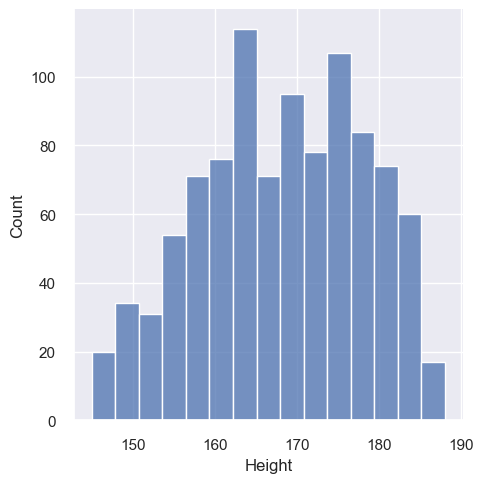

In [11]:
#Data Distribution for Numerical Column - children
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_data['Height'])
plt.show()

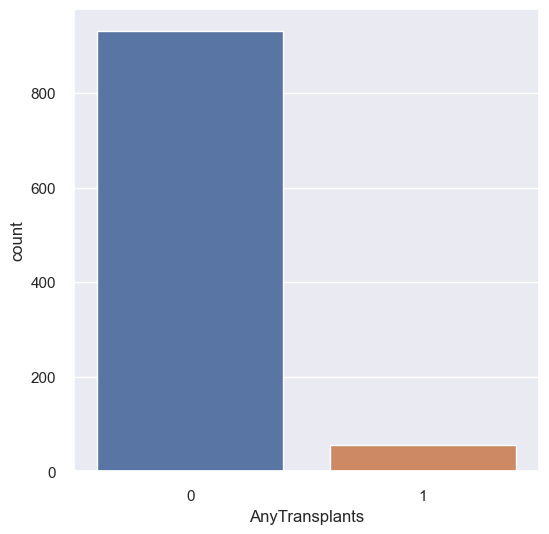

In [12]:
#Column charts for Categorical Column - sex
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['AnyTransplants'], data = insurance_data)
plt.show()

In [13]:
insurance_data['BloodPressureProblems'].value_counts()

0    524
1    462
Name: BloodPressureProblems, dtype: int64

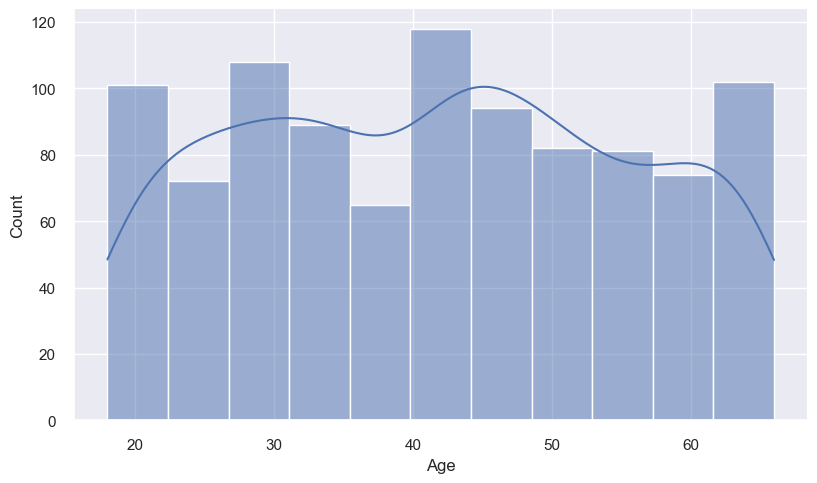

In [14]:
df = pd.read_csv("D:/major project/code/Medicalpremium.csv")

sns.displot(x='Age',data=df,aspect=10/6,kde=True)

Text(0.5, 1.0, 'Insurance Premium Price by Age')

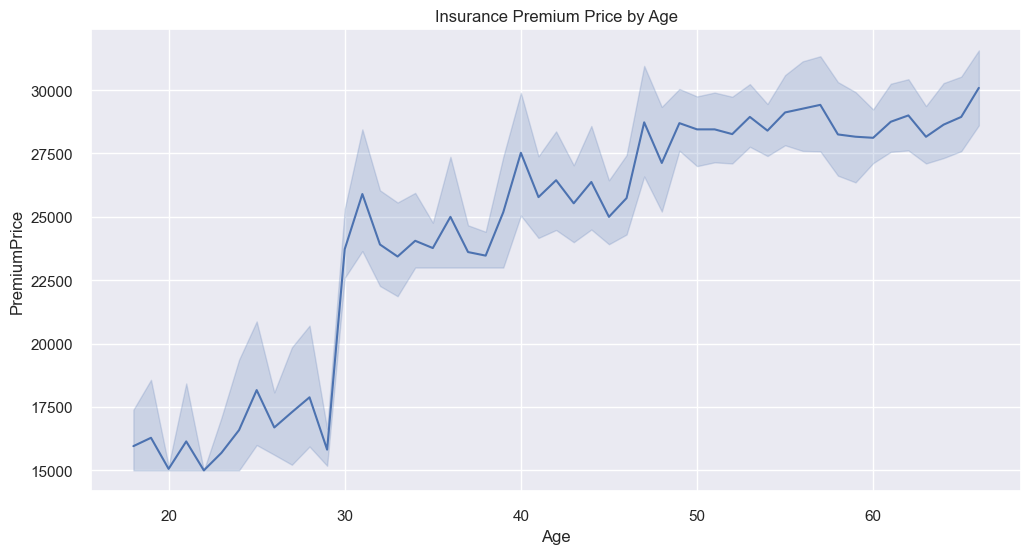

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
sns.lineplot(x=df.Age,y=df.PremiumPrice).set_title('Insurance Premium Price by Age')

In [16]:
cols = df.columns
cols

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

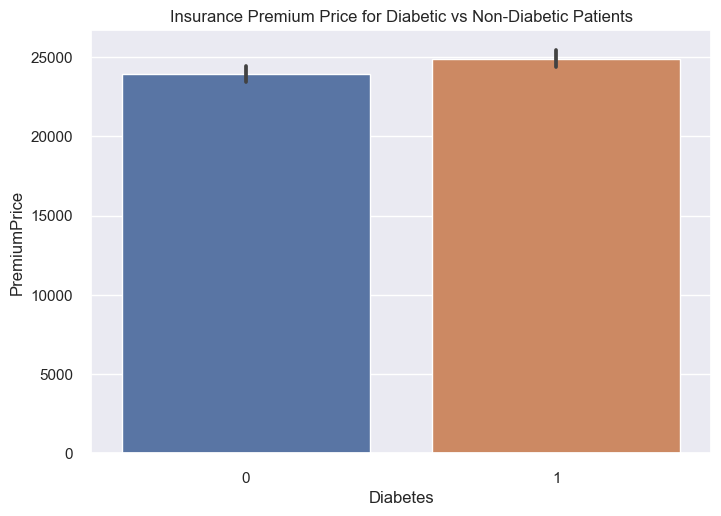

In [17]:
plot = sns.barplot(data=df, x="Diabetes", y= "PremiumPrice" ).set_title('Insurance Premium Price for Diabetic vs Non-Diabetic Patients')

Text(0.5, 0.98, 'Density plot for Diabetic vs Non-Diabetic Patients')

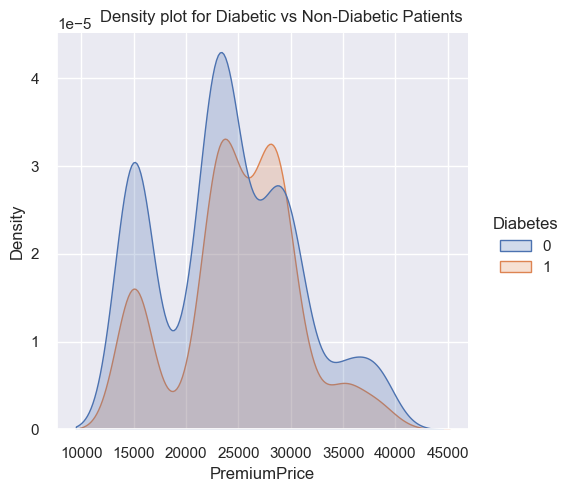

In [18]:
plot= sns.displot(df, x="PremiumPrice", hue="Diabetes", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Diabetic vs Non-Diabetic Patients',
                  fontsize=12, fontdict={"weight": "bold"})

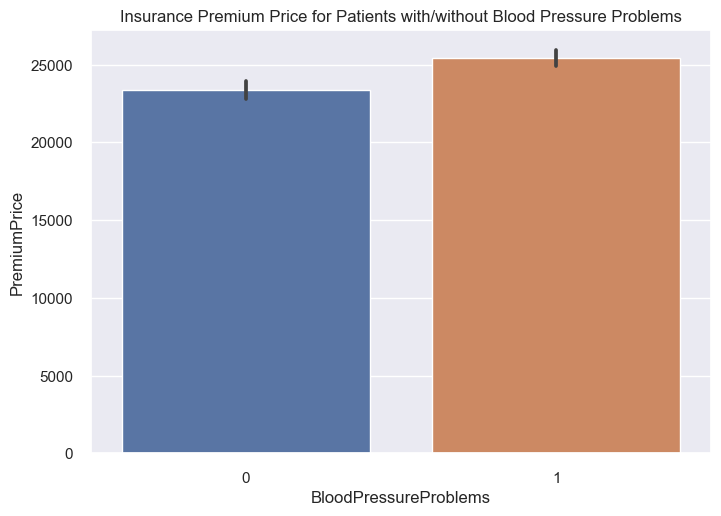

In [19]:
plot = sns.barplot(data=df, x="BloodPressureProblems", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Blood Pressure Problems')


Text(0.5, 0.98, 'Density plot for Patients with/without Blood Pressure Problems')

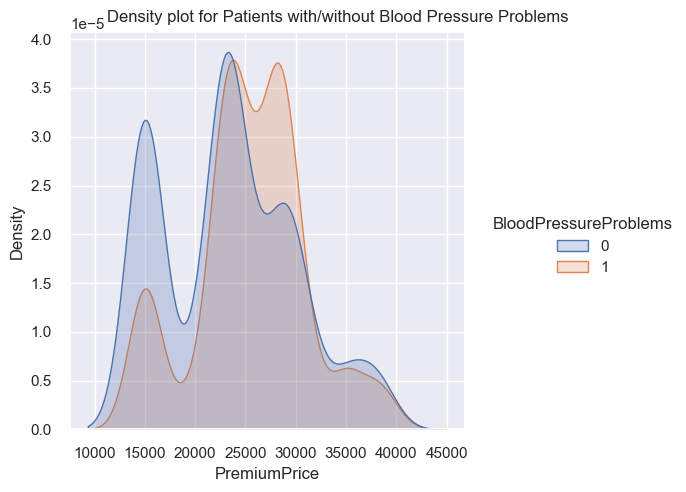

In [20]:
plot= sns.displot(df, x="PremiumPrice", hue="BloodPressureProblems", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Blood Pressure Problems',
                  fontsize=12, fontdict={"weight": "bold"})

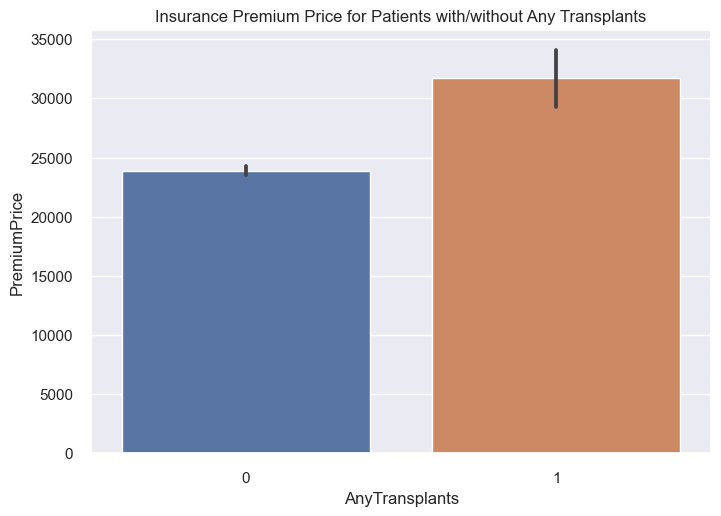

In [21]:
plot = sns.barplot(data=df, x="AnyTransplants", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Transplants')


Text(0.5, 0.98, 'Density plot for Patients with/without Any Transplants')

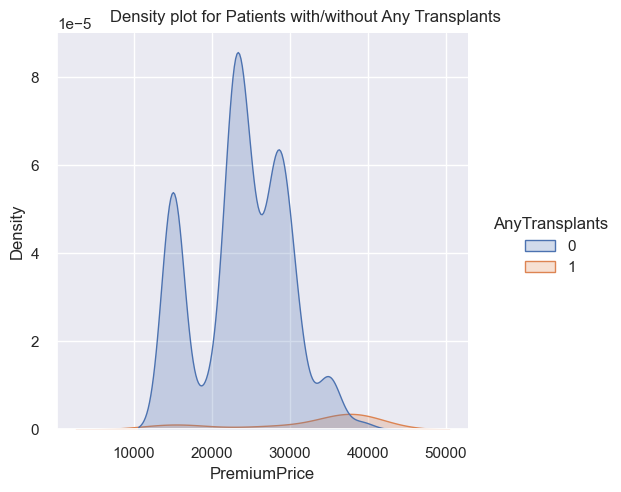

In [22]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyTransplants", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Transplants',
                  fontsize=12, fontdict={"weight": "bold"})

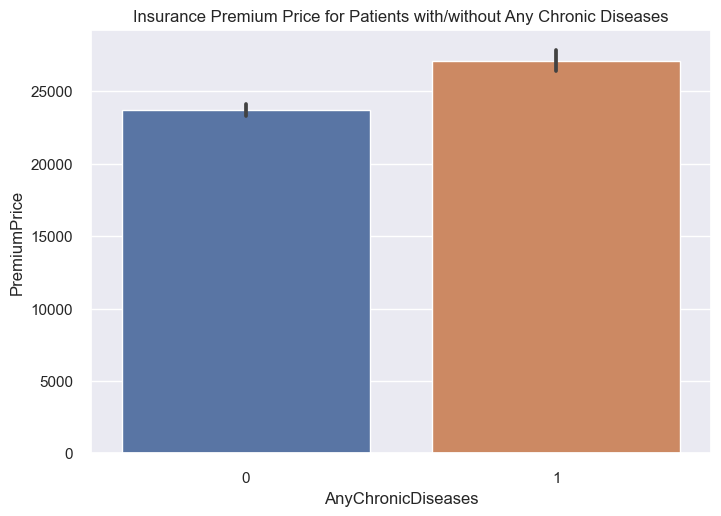

In [23]:

plot = sns.barplot(data=df, x="AnyChronicDiseases", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Chronic Diseases')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Chronic Diseases')

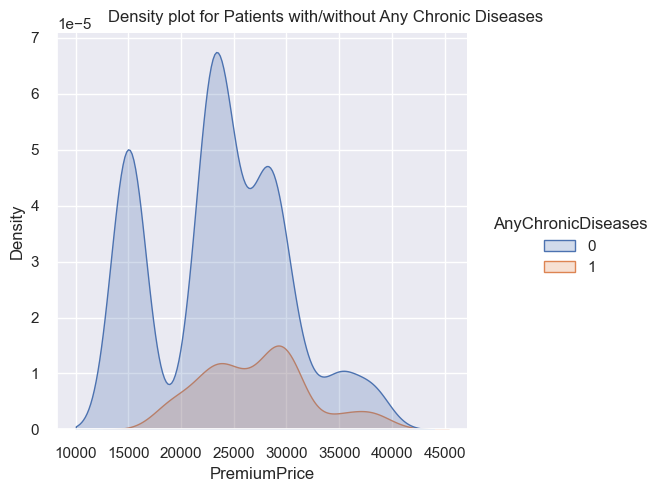

In [24]:
plot= sns.displot(df, x="PremiumPrice", hue="AnyChronicDiseases", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Chronic Diseases',
                  fontsize=12, fontdict={"weight": "bold"})

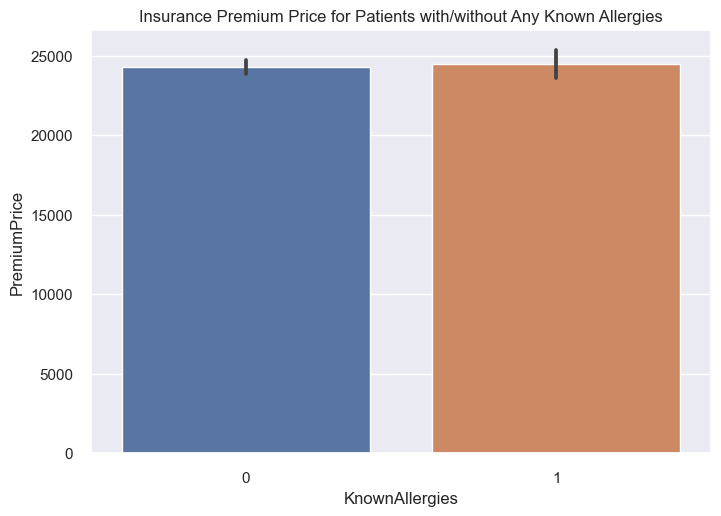

In [25]:
plot = sns.barplot(data=df, x="KnownAllergies", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any Known Allergies')

Text(0.5, 0.98, 'Density plot for Patients with/without Any Known Allergies')

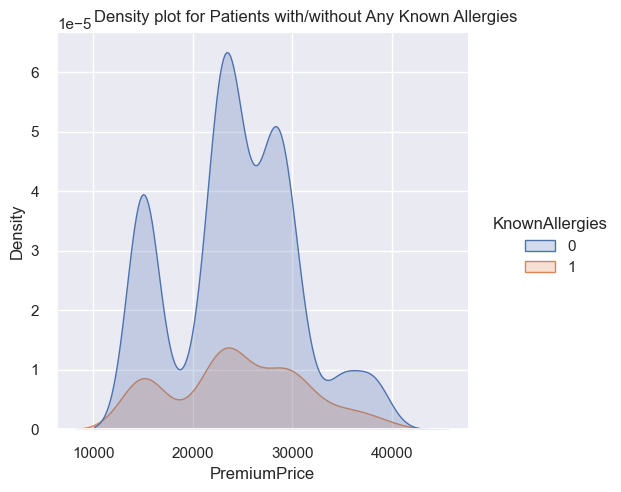

In [26]:
plot= sns.displot(df, x="PremiumPrice", hue="KnownAllergies", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any Known Allergies',
                  fontsize=12, fontdict={"weight": "bold"})

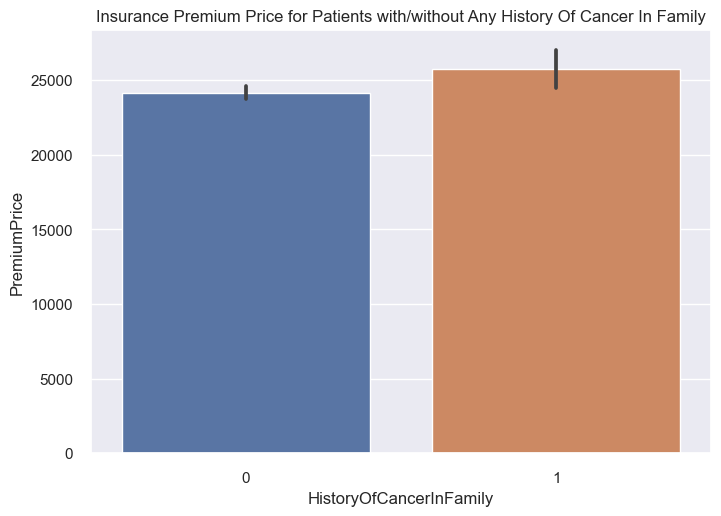

In [27]:
plot = sns.barplot(data=df, x="HistoryOfCancerInFamily", y= "PremiumPrice" ).set_title('Insurance Premium Price for Patients with/without Any History Of Cancer In Family')

Text(0.5, 0.98, 'Density plot for Patients with/without Any History Of Cancer In Family')

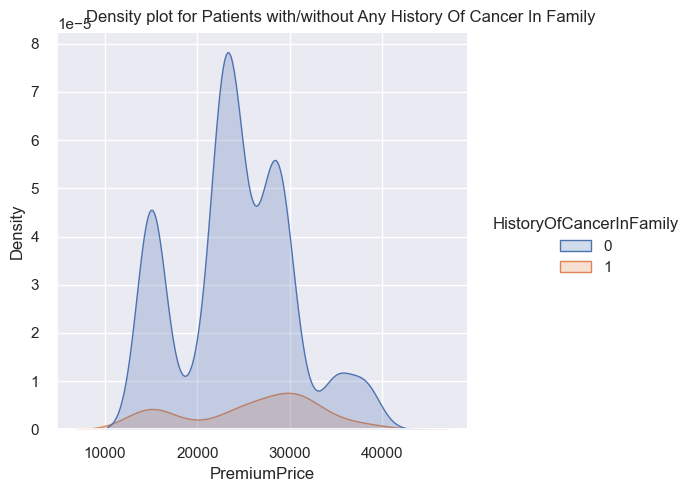

In [28]:
plot= sns.displot(df, x="PremiumPrice", hue="HistoryOfCancerInFamily", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Patients with/without Any History Of Cancer In Family',
                  fontsize=12, fontdict={"weight": "bold"})

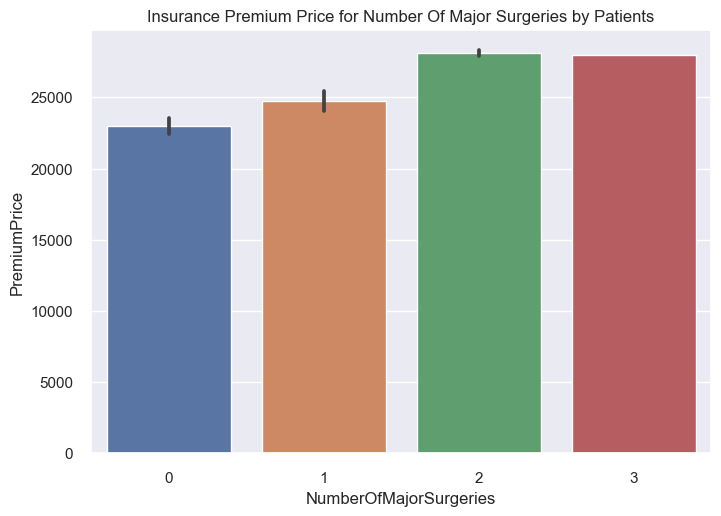

In [29]:
plot = sns.barplot(data=df, x="NumberOfMajorSurgeries", y= "PremiumPrice" ).set_title('Insurance Premium Price for Number Of Major Surgeries by Patients')

C:\Users\bchak\AppData\Local\Temp\ipykernel_5432\165807828.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )


Text(0.5, 0.98, 'Density plot for Number Of Major Surgeries by Patients')

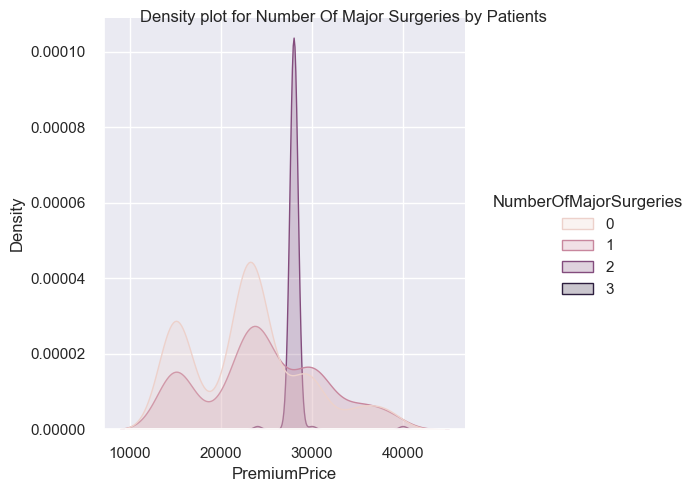

In [30]:
plot= sns.displot(df, x="PremiumPrice", hue="NumberOfMajorSurgeries", kind="kde", fill=True, )
plot.fig.suptitle('Density plot for Number Of Major Surgeries by Patients',
                  fontsize=12, fontdict={"weight": "bold"})

<Axes: >

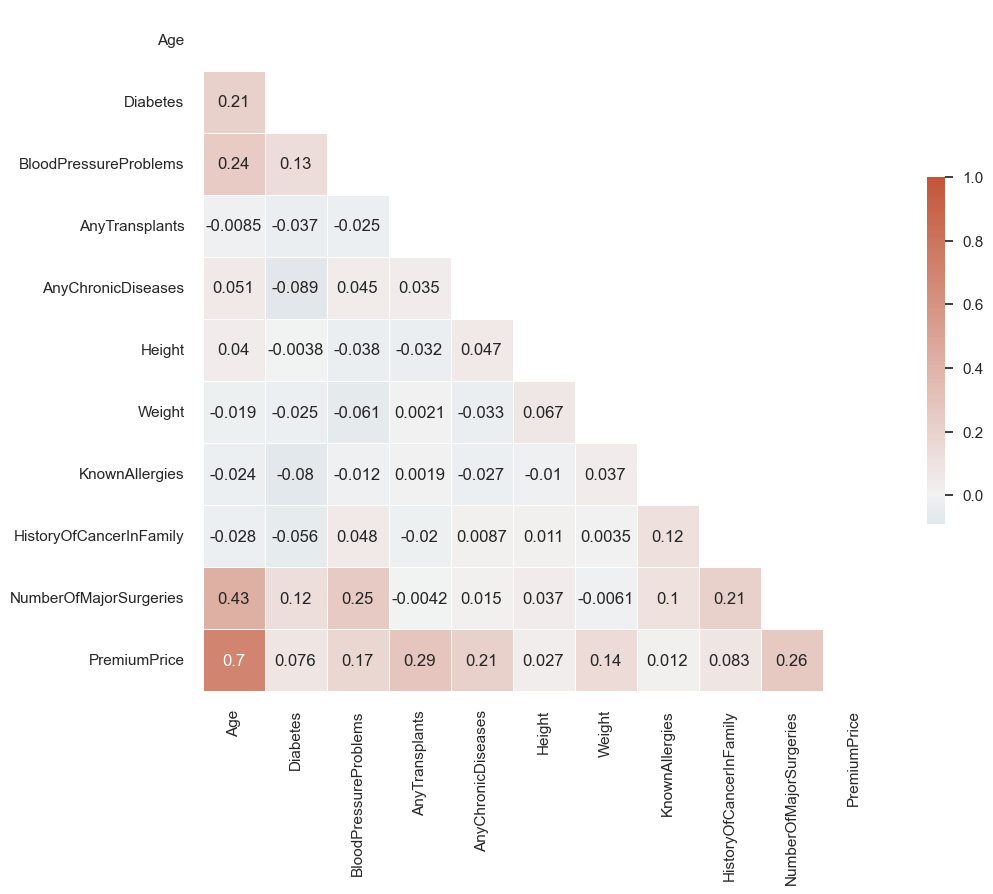

In [31]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = df
d = pd.DataFrame(data=rs,
                 columns=cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

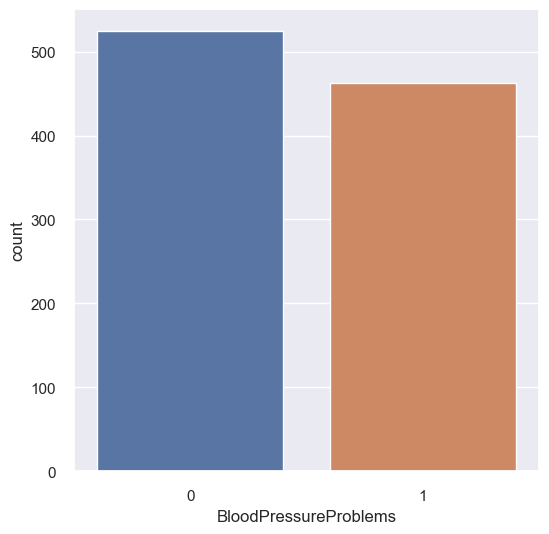

In [32]:
#Column charts for Categorical Column - region
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x= insurance_data['BloodPressureProblems'], data = insurance_data)
plt.show()

In [33]:
insurance_data['BloodPressureProblems'].value_counts()

0    524
1    462
Name: BloodPressureProblems, dtype: int64

In [34]:
insurance_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [35]:
insurance_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [36]:


input_data = insurance_data.drop(columns='PremiumPrice')
output_data = insurance_data['PremiumPrice']

In [37]:
input_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1
...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0
982,64,1,1,0,0,153,70,0,0,3
983,56,0,1,0,0,155,71,0,0,1
984,47,1,1,0,0,158,73,1,0,1


In [38]:
output_data

0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Check the shapes of input and output data
print("Input shape:", input_data)
print("Output shape:", output_data)

# Splitting the data into training and testing sets
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Check the shapes of the training and testing data
print("Train input shape:", input_train_data.shape)
print("Test input shape:", input_test_data.shape)
print("Train output shape:", output_train_data.shape)
print("Test output shape:", output_test_data.shape)


Input shape:      Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  W

In [40]:
print(input_data.shape, input_train_data.shape, input_test_data.shape)

(986, 10) (788, 10) (198, 10)


In [41]:
print(output_data.shape, output_train_data.shape, output_test_data.shape)

(986,) (788,) (198,)


In [42]:
#Model Creation 

#model = RandomForestRegressor(n_estimators=1000, max_depth=30)

In [43]:
#Training Model

#model.fit(input_train_data, output_train_data)

In [44]:
#predicting values with Test Dataset

#test_data_predictions = model.predict(input_test_data) 

In [45]:
#Evaluating Model

#from sklearn.metrics import r2_score

In [46]:
#r2_score(test_data_predictions,output_test_data)

In [47]:
'''from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time
import memory_profiler

# Train Score (R2)
train_data_predictions = model.predict(input_train_data)
train_r2_score = r2_score(train_data_predictions, output_train_data)
print("Train Score (R2):", train_r2_score)

# Test Score (R2)
test_r2_score = r2_score(test_data_predictions, output_test_data)
print("Test Score (R2):", test_r2_score)

# CV Score (R2)
cv_scores = cross_val_score(model, input_data, output_data, cv=5, scoring='r2')
print("CV Score (R2):", cv_scores.mean())

# Mean Absolute Error (MAE)
mae_score = mean_absolute_error(output_test_data, test_data_predictions)
print("MAE Score:", mae_score)

# Root Mean Squared Error (RMSE)
rmse_score = mean_squared_error(output_test_data, test_data_predictions, squared=False)
print("RMSE Score:", rmse_score)

# Mean Absolute Percentage Error (MAPE)
mape_score = np.mean(np.abs((output_test_data - test_data_predictions) / output_test_data)) * 100
print("MAPE Score (%):", mape_score)

# Elapsed Time
start_time = time.time()
# Training and prediction steps...
elapsed_time = time.time() - start_time
print("Elapsed Time (Sec):", elapsed_time)

# Memory Used
memory_usage = memory_profiler.memory_usage()
print("Memory Used (MB):", max(memory_usage))'''


'from sklearn.model_selection import cross_val_score\nfrom sklearn.metrics import mean_absolute_error, mean_squared_error\nimport time\nimport memory_profiler\n\n# Train Score (R2)\ntrain_data_predictions = model.predict(input_train_data)\ntrain_r2_score = r2_score(train_data_predictions, output_train_data)\nprint("Train Score (R2):", train_r2_score)\n\n# Test Score (R2)\ntest_r2_score = r2_score(test_data_predictions, output_test_data)\nprint("Test Score (R2):", test_r2_score)\n\n# CV Score (R2)\ncv_scores = cross_val_score(model, input_data, output_data, cv=5, scoring=\'r2\')\nprint("CV Score (R2):", cv_scores.mean())\n\n# Mean Absolute Error (MAE)\nmae_score = mean_absolute_error(output_test_data, test_data_predictions)\nprint("MAE Score:", mae_score)\n\n# Root Mean Squared Error (RMSE)\nrmse_score = mean_squared_error(output_test_data, test_data_predictions, squared=False)\nprint("RMSE Score:", rmse_score)\n\n# Mean Absolute Percentage Error (MAPE)\nmape_score = np.mean(np.abs((out

In [48]:
# Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
'''input_data = (23,0,0,0,0,160,60,0,0,0)
input_data_array = np.asarray(input_data)
input_data_array = input_data_array.reshape(1,-1)'''

'input_data = (23,0,0,0,0,160,60,0,0,0)\ninput_data_array = np.asarray(input_data)\ninput_data_array = input_data_array.reshape(1,-1)'

In [49]:
#insurance_premium = model.predict(input_data_array)

In [50]:
#insurance_premium[0]

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time
import memory_profiler

# Load your data here (the line below is just a placeholder, replace it with your actual data loading code)

# Splitting the data into training and testing sets 
input_data = insurance_data.drop(columns='PremiumPrice')
output_data = insurance_data['PremiumPrice']
input_train_data, input_test_data, output_train_data, output_test_data = train_test_split(
    input_data, output_data, test_size=0.2, random_state=42)

# Output the shapes of the training and testing data to ensure everything is split correctly
print("Train input shape:", input_train_data.shape)
print("Test input shape:", input_test_data.shape)
print("Train output shape:", output_train_data.shape)
print("Test output shape:", output_test_data.shape)

# Initialize the RandomForestRegressor with default hyperparameters for GridSearch
model = RandomForestRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)

# Time the grid search
start_time = time.time()
grid_search.fit(input_train_data, output_train_data)  # Fit model to the training data
grid_search_time = time.time() - start_time
print("Grid Search Time (Sec):", grid_search_time)

# Best model after grid search
best_model = grid_search.best_estimator_

# Time the prediction
start_time = time.time()
test_data_predictions = best_model.predict(input_test_data)
prediction_time = time.time() - start_time
print("Prediction Time (Sec):", prediction_time)

# Calculating and printing the R2 score for test data
test_r2_score = r2_score(output_test_data, test_data_predictions)
print("Test R2 score:", test_r2_score)

# Display the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# CV Score using the best model parameters
start_time = time.time()
cv_scores = cross_val_score(best_model, input_data, output_data, cv=5, scoring='r2')    
cv_time = time.time() - start_time
print("CV Score (R2):", cv_scores.mean())
print("Cross-validation Time (Sec):", cv_time)

mae_score = mean_absolute_error(output_test_data, test_data_predictions)
print("MAE Score:", mae_score)

rmse_score = mean_squared_error(output_test_data, test_data_predictions, squared=False)
print("RMSE Score:", rmse_score)

# Mean Absolute Percentage Error (MAPE)
mape_score = np.mean(np.abs((output_test_data - test_data_predictions) / output_test_data)) * 100
print("MAPE Score (%):", mape_score)

# Memory Usage
memory_usage = memory_profiler.memory_usage(max_usage=True)
print("Memory Used (MB):", memory_usage)


Train input shape: (788, 10)
Test input shape: (198, 10)
Train output shape: (788,)
Test output shape: (198,)
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Grid Search Time (Sec): 381.56096839904785
Prediction Time (Sec): 0.04158902168273926
Test R2 score: 0.9010125323663648
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
CV Score (R2): 0.8070435606999599
Cross-validation Time (Sec): 5.086533069610596
MAE Score: 985.7909528648978
RMSE Score: 2054.5320509911303
MAPE Score (%): 4.261601373813999
Memory Used (MB): 353.078125


In [52]:

# Example of predicting with an array of features
input_data = np.array([23,0,0,0,0,160,60,0,0,0]).reshape(1, -1)
insurance_premium = best_model.predict(input_data)
print("Predicted insurance premium:", insurance_premium[0])

Predicted insurance premium: 15073.964285714286


c:\Users\bchak\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Residuals plot + Q-Q plot (yellowbrick) for RF model

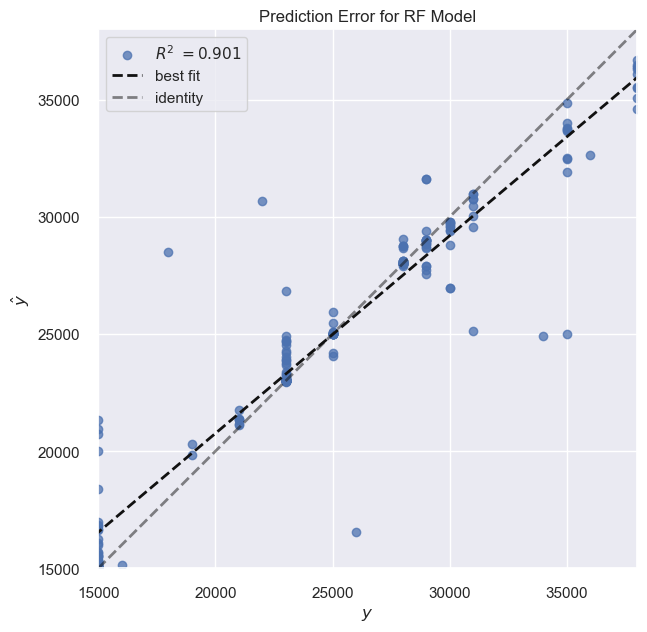

In [53]:
from yellowbrick.regressor import prediction_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings  as ws



# Instantiate and fit the RandomForestRegressor
#model = RandomForestRegressor(random_state=42)
#model.fit(input_train_data, output_train_data)

# Plot prediction error
fig, ax = plt.subplots(figsize=(10, 7))
_ = prediction_error(estimator=best_model,
                     X_train=input_train_data,
                     y_train=output_train_data,
                     X_test=input_test_data,
                     y_test=output_test_data,
                     is_fitted=True,
                     ax=ax,
                     title="Prediction Error for RF Model")

plt.show()


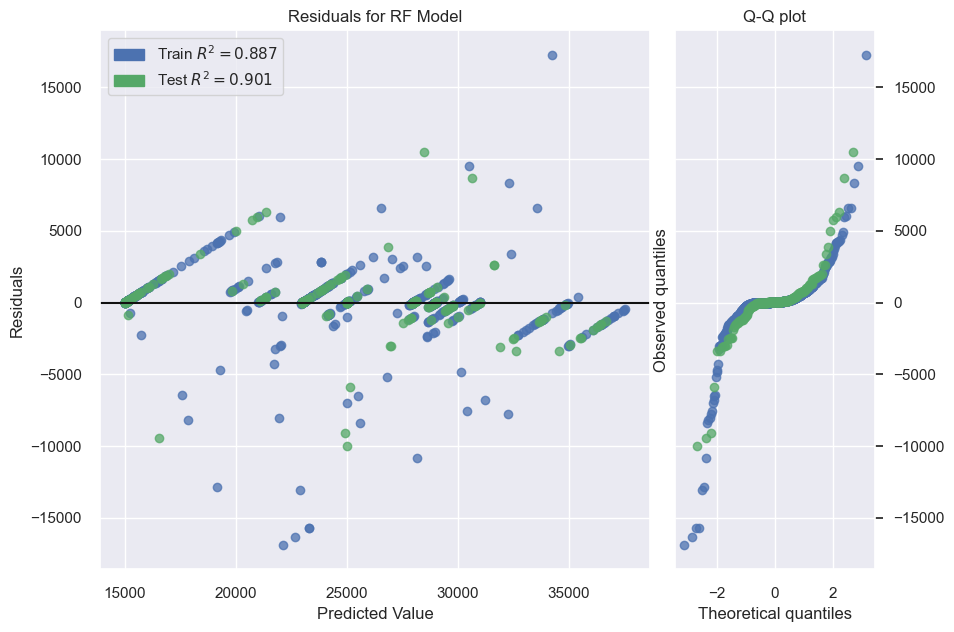

In [54]:


fig, ax = plt.subplots(figsize=(10, 7))
_ = residuals_plot(estimator=best_model,
                   is_fitted=True,
                   ax=ax,
                   X_train=input_train_data,
                     y_train=output_train_data,
                     X_test=input_test_data,
                     y_test=output_test_data,
                   hist=False,
                   qqplot=True,
                  title="Residuals for RF Model"
                  )

## SHAP analysis


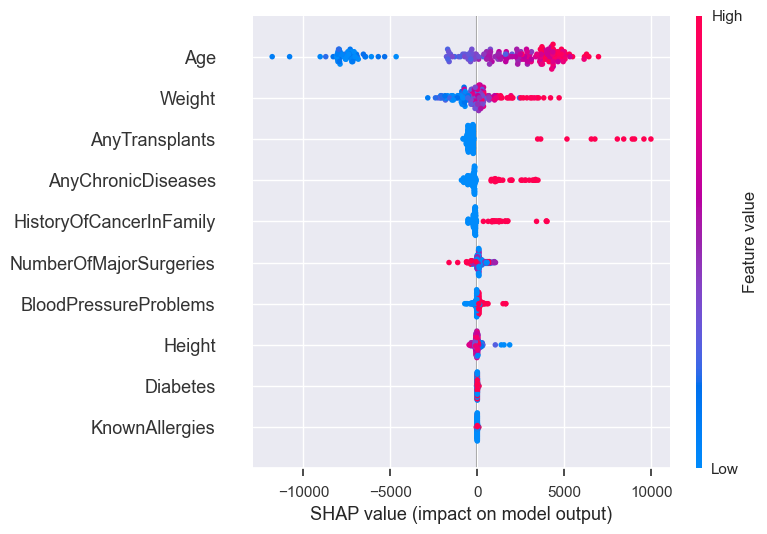

In [55]:
# SHAP analysis
explainer = shap.TreeExplainer(best_model)
RF_shap_values = explainer.shap_values(input_test_data)

# Plot SHAP summary
shap.summary_plot(RF_shap_values, input_test_data)


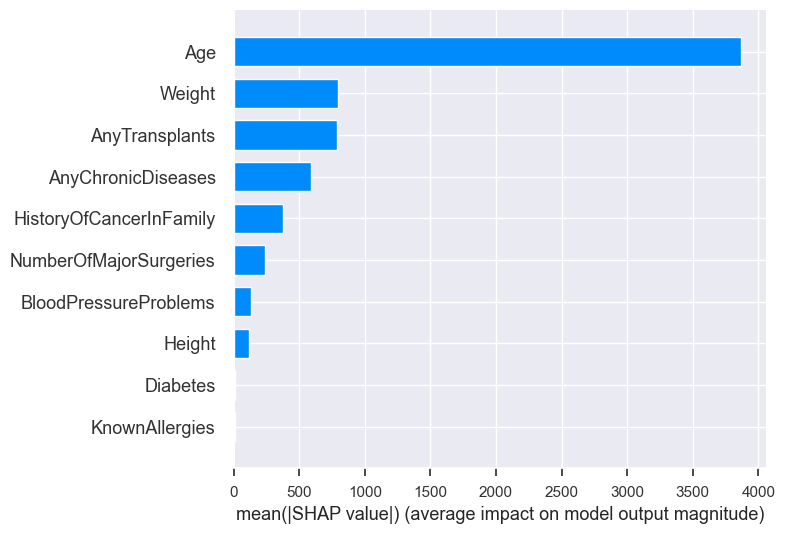

In [56]:
shap.summary_plot(RF_shap_values, input_test_data, plot_type="bar")

## ICE plot for RF Model

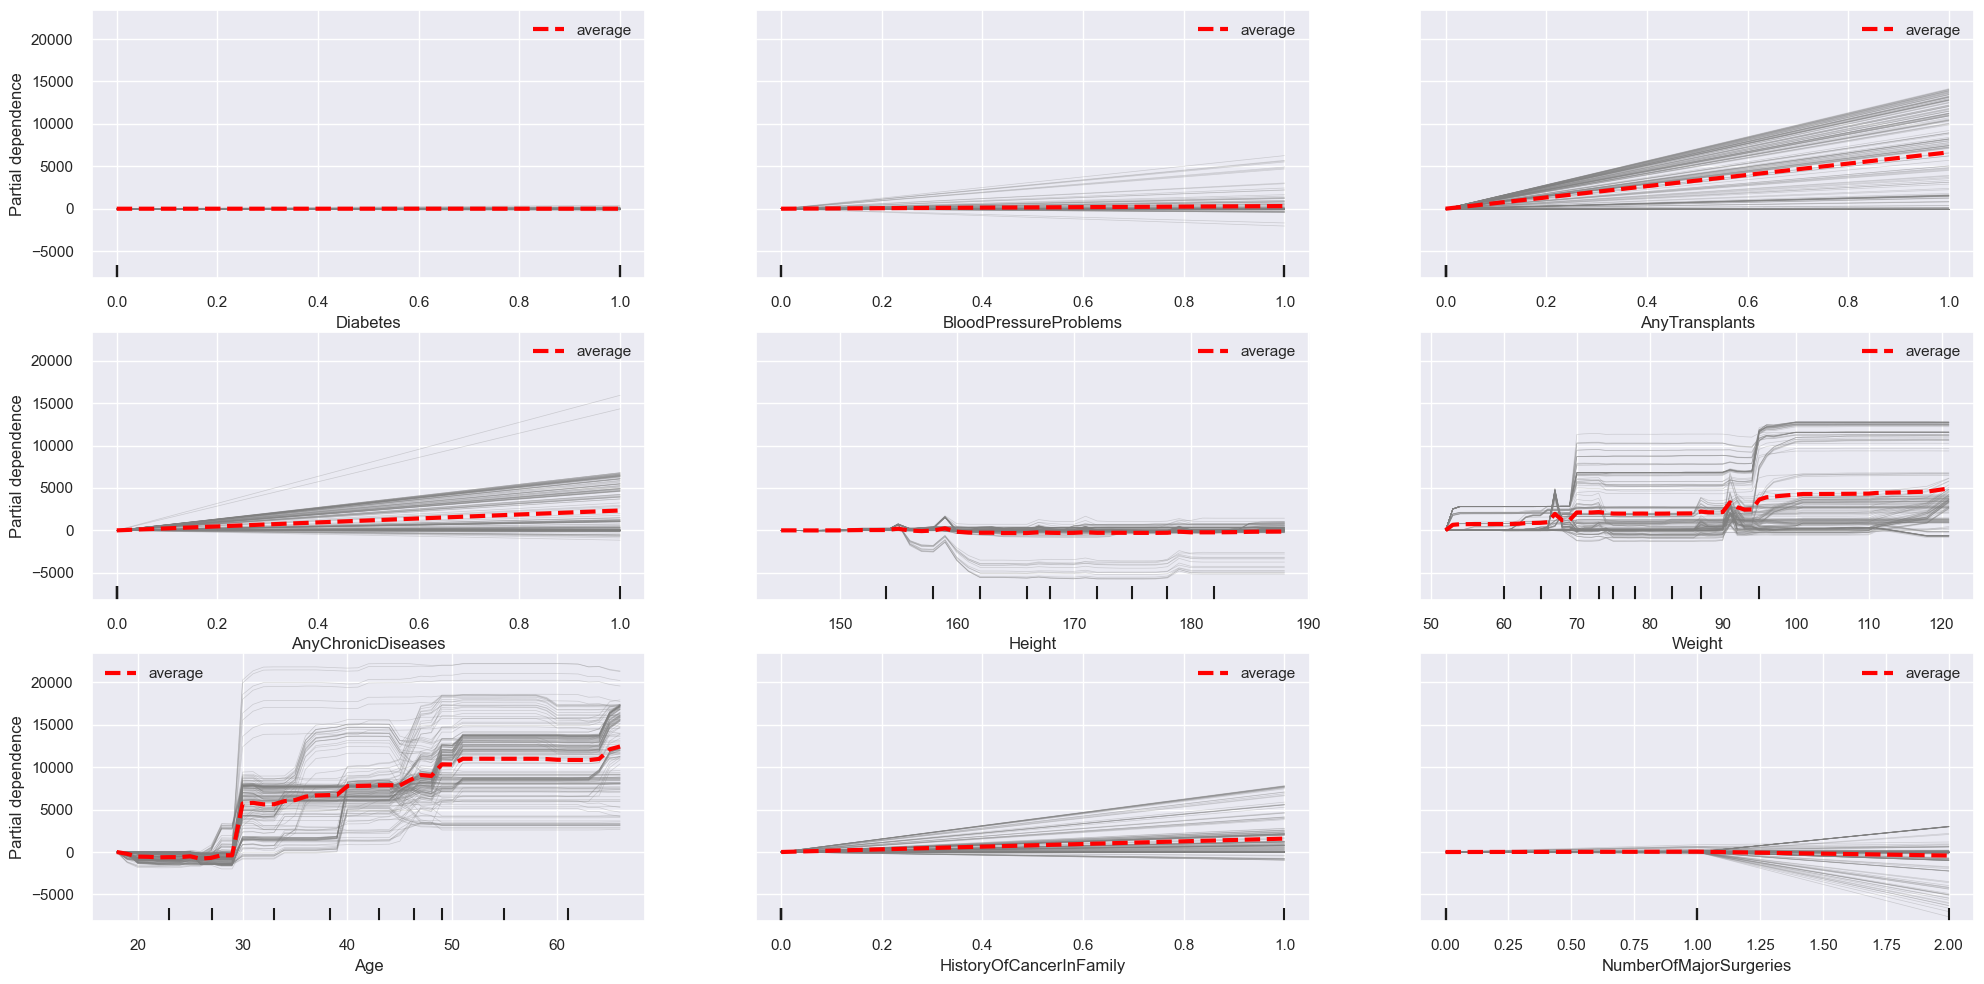

In [57]:
cols = input_test_data.columns
# Determine the 9 features with highest value for "feature importance" to draw the ICE plots.
included_features_indices = np.argpartition(best_model.feature_importances_, -9)[-9:]

# Plot the ICE plots.
fig, ax = plt.subplots(figsize=(20, 10))
fig.set_tight_layout(True)  # Make sure labels of axes don't overlap in the final figure.
_ = PartialDependenceDisplay.from_estimator(estimator=best_model,
                                            ax=ax,
                                            X=input_test_data,
                                            features=[i for i in included_features_indices],
                                            feature_names=cols,
                                            n_cols=3,
                                            centered= True,
                                            kind='both',
                                            ice_lines_kw={'color': 'gray'},
                                            pd_line_kw={'color': 'red', 'linewidth': 3, 'linestyle': 'dashed'})

In [58]:
import pickle as pkl

In [59]:
pkl.dump(best_model, open('final.pkl','wb'))